### This is my first personal quantum computing project.

The goal is to create a quantum computer and measure its output.

The output will be tested on both classical computer (simulated locally), and real quantum device (IBM QC)

Have fun!!!

In [1]:
#load qiskit library

import qiskit

In [2]:
#check qiskit version

qiskit.__qiskit_version__

{'qiskit-terra': '0.9.0',
 'qiskit-ignis': '0.2.0',
 'qiskit-aqua': '0.6.0',
 'qiskit': '0.12.1',
 'qiskit-aer': '0.3.0',
 'qiskit-ibmq-provider': '0.3.3'}

In [3]:
#import IBMQ from qiskit library

from qiskit import IBMQ

In [4]:
#go to IBM Q Experience (https://quantum-computing.ibm.com/) to create account and get API
IBMQ.save_account('IBMQ API goes here')

/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [5]:
#load account to see what access you have
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [6]:
#real project starts here.

from qiskit import *

In [7]:
#creating a quantum register with 2 qubits

qr = QuantumRegister(2) #quantum register

In [8]:
#creating a classical register with 2 classical bits

cr = ClassicalRegister(2) #classical register

In [9]:
#build a circuit using the two quantum and classical registers

circuit = QuantumCircuit(qr, cr)

In [10]:
#draw the circuit to see what it looks like

%matplotlib inline #this lets the drawing show in the notebook

circuit.draw()

In [11]:
#this circuit is not interesting because there's no gates.
#apply Hadamard gate on the first qubit to create entanglement

circuit.h(qr[0])

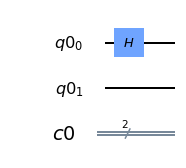

In [12]:
circuit.draw(output='mpl') #create a real drawing rather than just text

In [14]:
#create two qubit operations on the Hadamard gate called controlled X

#the two qubit operations is going to be like the if-operation i.e. if 'this', then 'that'

circuit.cx(qr[0], qr[1]) #the control is the first qubit and the target is the second target

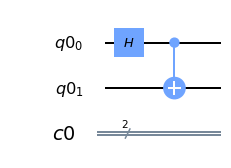

In [15]:
circuit.draw(output='mpl')

In [17]:
#next is to measure our qubit operations and store the result in the classical bits

circuit.measure(qr, cr)

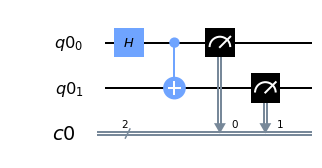

In [18]:
circuit.draw(output='mpl')

In [19]:
#now to do two things:

#1. run the quantum circuit on classical computer and see what happens when quantum computer is simulated
#2. send the quantum circuit to IBM to see what the output looks like on a real device

#to simulate the circuit on a local computer, use the aer component of qiskit

#QASM comes from quantum assembly language

simulator = Aer.get_backend('qasm_simulator')

In [27]:
result = execute(circuit, backend = simulator).result() #execute the quantum circuit and store the result in a variable

In [28]:
#what's the result of the execution

from qiskit.tools.visualization import plot_histogram

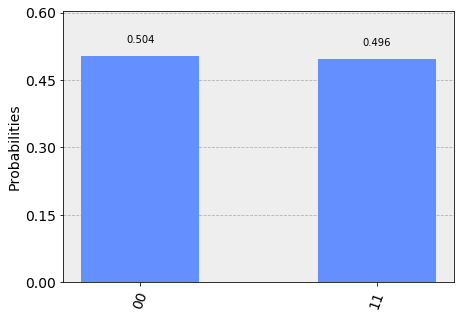

In [29]:
plot_histogram(result.get_counts(circuit))

In [31]:
#to run the cct on IBM device, load account which has already been loaded above

provider = IBMQ.get_provider(hub = 'ibm-q')

In [33]:
#to find the least busy backend device

num_qubits = 2

from qiskit.providers.ibmq import least_busy
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_vigo


In [36]:
qcomp = provider.get_backend('ibmq_vigo')

In [37]:
job = execute(circuit, backend=qcomp)

In [38]:
from qiskit.tools.monitor import job_monitor

In [39]:
job_monitor(job)

Job Status: job has successfully run


In [40]:
result = job.result()

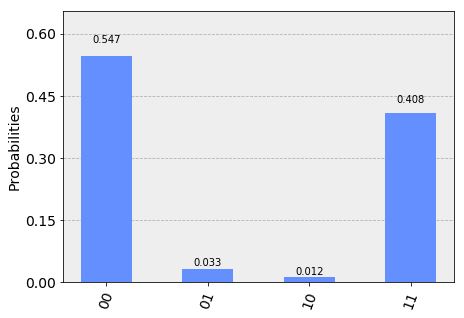

In [41]:
plot_histogram(result.get_counts(circuit))

In [42]:
from qiskit.tools.monitor import backend_overview

In [43]:
backend_overview()

ibmq_ourense                 ibmq_vigo                    ibmq_16_melbourne
------------                 ---------                    -----------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  14
Pending Jobs: 28             Pending Jobs: 2              Pending Jobs: 25
Least busy:   False          Least busy:   True           Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      80.7           Avg. T1:      105.3          Avg. T1:      49.8
Avg. T2:      64.8           Avg. T2:      71.2           Avg. T2:      68.7



ibmqx2
------
Num. Qubits:  5
Pending Jobs: 66
Least busy:   False
Operational:  True
Avg. T1:      57.5
Avg. T2:      40.4



